Quiero crear un programa que dadas dos imagenes, nos cambie los colores de tal forma que alla los mismo pixeles en ambas. Que si ordenamos los pixeles sean indistinguibles.
# Primero
Dada una imagen inicial creo que lo mejor es cambiar tantos pixeles de la segunda cercanos a los valores de la primera.

In [1]:
#primero voy a ver si puedo ordenar una imagen en funcion a loz pixeles, una imagen en blanco y negro
imagen_path="/home/arturo/Imágenes/avion1.jpg"

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img=cv2.imread(imagen_path)
img_grey=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

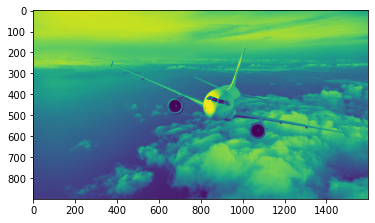

In [4]:
plt.imshow(img_grey)

In [5]:
img_shape=img_grey.shape
img_shape

(900, 1600)

In [6]:
img_sort=np.array(sorted(img_grey.flatten()))

In [7]:
img_reshaped=np.reshape(img_sort,img_shape)

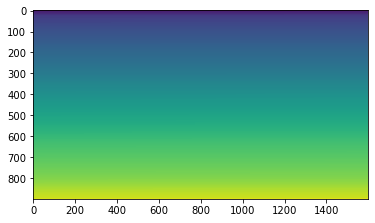

In [8]:
plt.imshow(img_reshaped)

In [9]:
#ahora con la segunda imagen vamos a colocar los pixeles en las posiciones que tocan
imagen_path_2="/home/arturo/Imágenes/ciudad1.jpg"

In [10]:
img2=cv2.imread(imagen_path_2)
img_grey2=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
img_grey2_samesize=cv2.resize(img_grey2,(img_shape[1],img_shape[0]))
img_grey2_samesize.shape

(900, 1600)

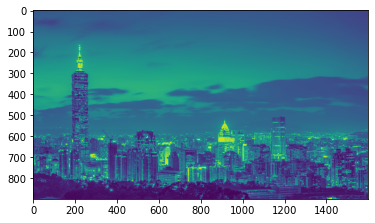

In [11]:
plt.imshow(img_grey2_samesize)

In [12]:
img_grey2_flatten=img_grey2_samesize.flatten()

In [13]:
indices=np.argsort(img_grey2_flatten)

In [14]:
reconst_flatten_img=np.zeros(img_shape[0]*img_shape[1])
for i,j in enumerate(indices):
    reconst_flatten_img[j]=img_sort[i]
    

In [15]:
reconst_img=reconst_flatten_img.reshape(img_shape)

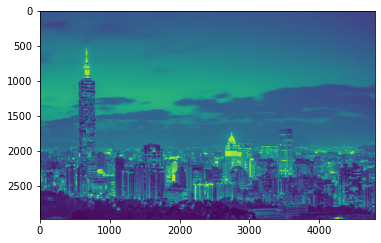

In [16]:
plt.imshow(img_grey2)

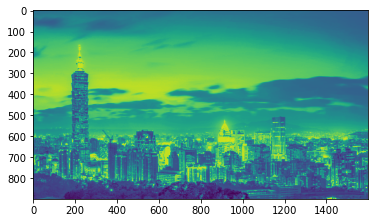

In [17]:
plt.imshow(reconst_img)

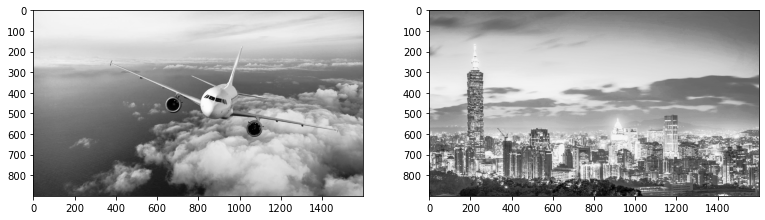

In [18]:
plt.figure(figsize=(13,13))
plt.subplot(1,2,1)
plt.imshow(-img_grey,cmap="Greys")
plt.subplot(1,2,2)
plt.imshow(-reconst_img,cmap="Greys")

Text(0.5, 1.0, 'Antes del cambio')

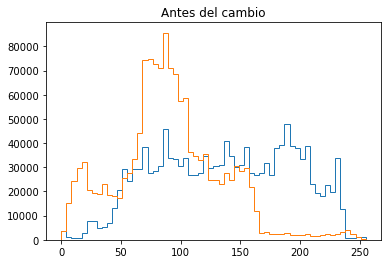

In [19]:
plt.hist(img_grey.flatten(),60,histtype="step");
plt.hist(img_grey2_flatten,60,histtype="step");
plt.title("Antes del cambio")

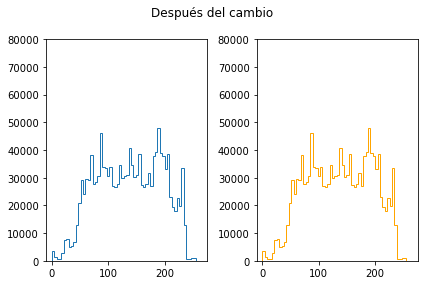

In [20]:
plt.subplot(1,2,1)
plt.hist(img_grey.flatten(),60,histtype="step");
plt.xlim([-10,275])
plt.ylim([0,80000])
plt.subplot(1,2,2)
plt.hist(reconst_flatten_img,60,histtype="step",color="orange");
plt.xlim([-10,275])
plt.ylim([0,80000])
fig=plt.gcf()
fig.suptitle("Después del cambio")
plt.tight_layout()

Hacer esto con color es un poco mas complicado porque ahora nos preguntamos, a que canal de color le prestamos atención? Vamos a hacer una cosa diferente, todos los canales los vamos a ordenar de la misma forma, de la forma en que ordenamos el blanco y negro.

In [64]:
imagen_path="/home/arturo/Imágenes/avion2.jpeg"
img=cv2.imread(imagen_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_shape=img.shape
img_sort=[np.array(sorted(img[:,:,i].flatten())) for i in range(3)]
imagen_path_2="/home/arturo/Imágenes/barco1.jpg"
img2=cv2.imread(imagen_path_2)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

#img_grey2=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
img2_samesize=cv2.resize(img2,(img_shape[1],img_shape[0]))
#lo aplanamos todo
img2_samesize_flat=[img2_samesize[:,:,i].flatten() for i in range(3)]
#los ordenamos 
img2_index=[np.argsort(i) for i in img2_samesize_flat]
final_img=[]
for k in range(3):
    reconst_flatten_img=np.zeros(img_shape[0]*img_shape[1])
    for i,j in enumerate(img2_index[k]):
        reconst_flatten_img[j]=img_sort[k][i]
    reconst_img=reconst_flatten_img.reshape(img_shape[0],img_shape[1])
    final_img.append(reconst_img)
final=np.stack(final_img,axis=-1)

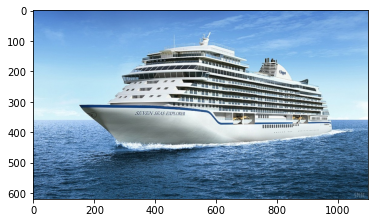

In [65]:
plt.imshow(img2)

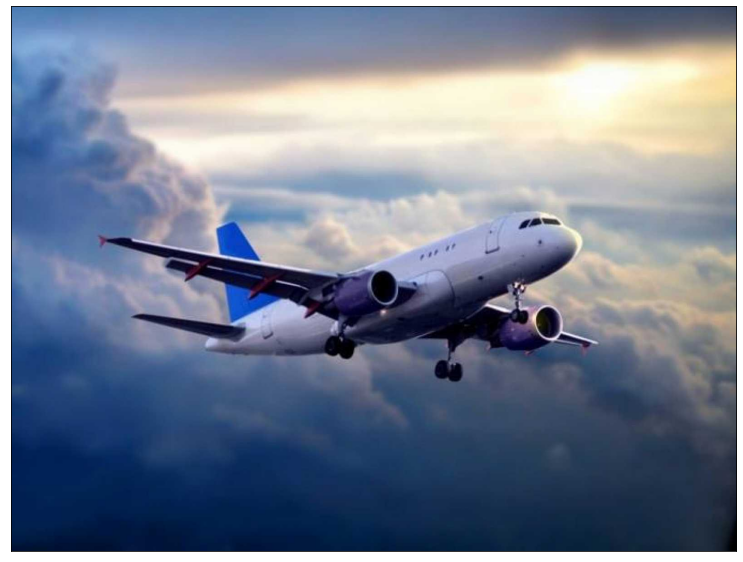

In [68]:
plt.figure(figsize=(13,13))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.savefig("avion_tfg.png")

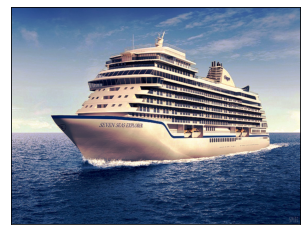

In [70]:
#plt.figure(figsize=(13,13))
plt.imshow(final/255)
plt.xticks([])
plt.yticks([])
plt.savefig("barco_tfg.png")

Esto ultimo ordena cada canal diferente y transfiere cada canal, pero no todos igual, para que sean los mismos pixeles, todoso los canales tienen que tener el mismo criterio de ordenacion.

In [50]:
imagen_path="/home/arturo/Imágenes/barco1.jpg"
img=cv2.imread(imagen_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_shape=img.shape
img_sort=[np.array(sorted(img[:,:,i].flatten())) for i in range(3)]
imagen_path_2="/home/arturo/Imágenes/avion2.jpeg"
img2=cv2.imread(imagen_path_2)
img2=cv2.cvtColor(img2,cv2.COLOR_RGB2BGR)
img2_samesize=cv2.resize(img2,(img_shape[1],img_shape[0]))
#lo aplanamos todo
img2_samesize_flat=[img2_samesize[:,:,i].flatten() for i in range(3)]
img2_samesize_grey=cv2.cvtColor(img2_samesize,cv2.COLOR_RGB2GRAY)
#los ordenamos 
img2_index_master=np.argsort(img2_samesize_grey.flatten()) 
final_img=[]
for k in range(3):
    reconst_flatten_img=np.zeros(img_shape[0]*img_shape[1])
    for i,j in enumerate(img2_index_master):
        reconst_flatten_img[j]=img_sort[k][i]
    reconst_img=reconst_flatten_img.reshape(img_shape[0],img_shape[1])
    final_img.append(reconst_img)
final=np.stack(final_img,axis=-1)

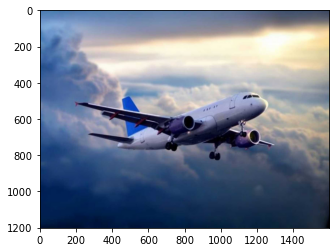

In [51]:
#plt.figure(figsize=(13,13))
plt.imshow(img2)

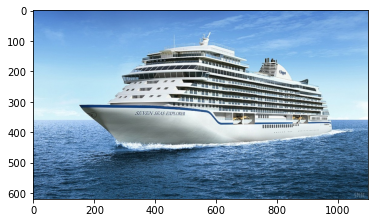

In [52]:
plt.imshow(img)

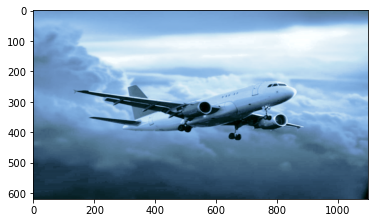

In [53]:
plt.imshow(final/255)